In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Download data

I started by using the url provided and the column names to generate a pandas dataframe containing the data.

In [2]:
# Data download

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/' \
      + 'breast-cancer-wisconsin/breast-cancer-wisconsin.data'
    
data = pd.read_csv(url,header=0,
                   names = ['SAMPLE_ID',
                            'CLUMP_THICKNESS',
                            'UNIFORMITY_SIZE',
                            'UNIFORMITY_SHAPE',
                            'MARGINAL_ADHESION',
                            'EPITHELIAL_SIZE',
                            'BARE_NUCLEI',
                            'BLAND_CHROMATIN',
                            'NORMAL_NUCLEOLI',
                            'MITOSES',
                            'CLASS'],
                  index_col=0)

# 1. Sample code number: id number 
# 2. Clump Thickness: 1 - 10 
# 3. Uniformity of Cell Size: 1 - 10 
# 4. Uniformity of Cell Shape: 1 - 10 
# 5. Marginal Adhesion: 1 - 10 
# 6. Single Epithelial Cell Size: 1 - 10 
# 7. Bare Nuclei: 1 - 10 
# 8. Bland Chromatin: 1 - 10 
# 9. Normal Nucleoli: 1 - 10 
# 10. Mitoses: 1 - 10 
# 11. Class: (2 for benign, 4 for malignant)

# Data cleaning

I then explore the data to check the dimensions and see that the data is in the form I am expecting, numbers between 1 and 10 for each of the 10 different. I have kept my sample ID's as an index for the rows of the dataframe.

In [3]:
print(data.shape)

data.head(10)

(698, 10)


,CLUMP_THICKNESS,UNIFORMITY_SIZE,UNIFORMITY_SHAPE,MARGINAL_ADHESION,EPITHELIAL_SIZE,BARE_NUCLEI,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES,CLASS
SAMPLE_ID,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2


This all looks in order -- 698 samples and all are numbers I expect. There is just one "malignant" case among the first 10 entries as indicated by Class=4, so I may hae unbalanced classes for my classification task. I check the frequencies of values across all fields to observe related issues.

In [4]:
print(data.apply(pd.value_counts))

    CLUMP_THICKNESS  UNIFORMITY_SIZE  UNIFORMITY_SHAPE  MARGINAL_ADHESION  \
1             145.0            383.0             352.0              406.0   
2              50.0             45.0              59.0               58.0   
3             108.0             52.0              56.0               58.0   
4              80.0             40.0              44.0               33.0   
5             129.0             30.0              34.0               23.0   
6              34.0             27.0              30.0               22.0   
7              23.0             19.0              30.0               13.0   
8              46.0             29.0              28.0               25.0   
9              14.0              6.0               7.0                5.0   
10             69.0             67.0              58.0               55.0   
1               NaN              NaN               NaN                NaN   
10              NaN              NaN               NaN                NaN   

/Users/neilpeterman/anaconda/envs/my_projects_env/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
/Users/neilpeterman/anaconda/envs/my_projects_env/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


All variables look reasonable including Class, where about 1/3 of the rows are "malignant", which is less unbalanced than I might have expected. Except one of the columns, 'BARE_NUCLEI' is being counted separately from all the others. I suspect this may be due to a different data type. I also notice that 16 of the entries for 'BARE_NUCLEI' show the character '?' so these look like missing values.

I check the data types in the dataframe:

In [5]:
print(data.dtypes)

CLUMP_THICKNESS       int64
UNIFORMITY_SIZE       int64
UNIFORMITY_SHAPE      int64
MARGINAL_ADHESION     int64
EPITHELIAL_SIZE       int64
BARE_NUCLEI          object
BLAND_CHROMATIN       int64
NORMAL_NUCLEOLI       int64
MITOSES               int64
CLASS                 int64
dtype: object


Indeed, all columns are integers except for 'BARE_NUCLEI'. This might be difficult to fix the parsing for pd.read_csv, so I just replace the column with a corrected column. I replace the non-numeric values with -1 and I'll decide what to do with these later.

In [6]:
x = data.BARE_NUCLEI.values
z = []
for y in x:
    try:
        y = int(y)
    except ValueError:
        y = -1
    z.append(y)

data2 = data.drop('BARE_NUCLEI', axis=1)
data2.insert(5,'BARE_NUCLEI',z)

In [7]:
print(data2.dtypes)
print(data2.apply(pd.value_counts))


data2.head()

CLUMP_THICKNESS      int64
UNIFORMITY_SIZE      int64
UNIFORMITY_SHAPE     int64
MARGINAL_ADHESION    int64
EPITHELIAL_SIZE      int64
BARE_NUCLEI          int64
BLAND_CHROMATIN      int64
NORMAL_NUCLEOLI      int64
MITOSES              int64
CLASS                int64
dtype: object
     CLUMP_THICKNESS  UNIFORMITY_SIZE  UNIFORMITY_SHAPE  MARGINAL_ADHESION  \
-1               NaN              NaN               NaN                NaN   
 1             145.0            383.0             352.0              406.0   
 2              50.0             45.0              59.0               58.0   
 3             108.0             52.0              56.0               58.0   
 4              80.0             40.0              44.0               33.0   
 5             129.0             30.0              34.0               23.0   
 6              34.0             27.0              30.0               22.0   
 7              23.0             19.0              30.0               13.0   
 8            

,CLUMP_THICKNESS,UNIFORMITY_SIZE,UNIFORMITY_SHAPE,MARGINAL_ADHESION,EPITHELIAL_SIZE,BARE_NUCLEI,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES,CLASS
SAMPLE_ID,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


These values are now what I expect and I can move on to exploration & modeling. Before I start this, I create a holdout set so I can test my model properly and avoid experimental over-fitting.

In [8]:
data_train, data_test = train_test_split(data2,
                                         test_size=0.2,
                                         random_state=78)

data_train.shape

(558, 10)

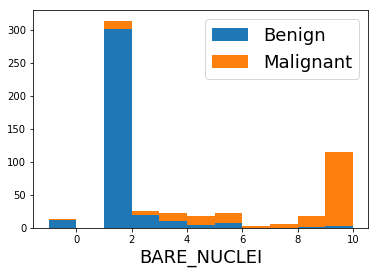

In [9]:
fig, ax1 = plt.subplots()

ax1.hist([data_train.loc[data_train.CLASS==2,'BARE_NUCLEI'].values,
          data_train.loc[data_train.CLASS==4,'BARE_NUCLEI'].values],
         label=('Benign','Malignant'),
         bins=11,histtype='barstacked')
ax1.set_xlabel('BARE_NUCLEI',fontsize=18)
ax1.legend(fontsize=18)

plt.show()

I started with the column with missing data. It is important that I treat this right because it appears to contain a lot of information for the classification task.

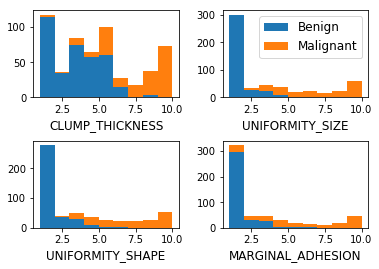

In [10]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5,wspace=.3)

cname = data_train.columns[0]
ax1.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax1.set_xlabel(cname,fontsize=12)

cname = data_train.columns[1]
ax2.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax2.set_xlabel(cname,fontsize=12)
ax2.legend(fontsize=12)

cname = data_train.columns[2]
ax3.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax3.set_xlabel(cname,fontsize=12)

cname = data_train.columns[3]
ax4.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax4.set_xlabel(cname,fontsize=12)

plt.show()

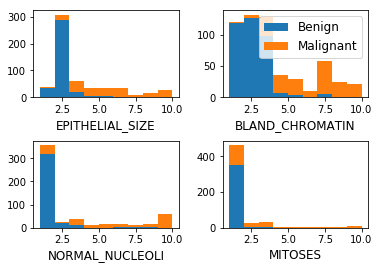

In [11]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5,wspace=.3)

cname = data_train.columns[4]
ax1.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax1.set_xlabel(cname,fontsize=12)

cname = data_train.columns[6]
ax2.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax2.set_xlabel(cname,fontsize=12)
ax2.legend(fontsize=12)

cname = data_train.columns[7]
ax3.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax3.set_xlabel(cname,fontsize=12)

cname = data_train.columns[8]
ax4.hist([data_train.loc[data_train.CLASS==2,cname].values,
          data_train.loc[data_train.CLASS==4,cname].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax4.set_xlabel(cname,fontsize=12)

plt.show()

So all of the data seem to carry information that can inform the classification task. However, I would like to examine the correlatedness of features. First I would like to impute data for BARE_NUCLEI. I would like to give a value that is likely to give little information about the outcome. The median over the entire dataset is 1.0, but this still appears to say a lot. If I balance the classes by downsampling the benign cases, the median is now different

In [12]:
import numpy.random as rand

cname = data_train.columns[5]
print(cname)

x = data_train.loc[data_train[cname]>0,cname].values
c = data_train.loc[data_train[cname]>0,'CLASS'].values
    
print('Unbalanced median = %d' % np.median(x))

# xb = data_train.loc[data_train.CLASS==2,cname]
# xm = data_train.loc[data_train.CLASS==4,cname]

xb = x[c==2]
xm = x[c==4]

print(xb.shape,xm.shape)

x_balanced = np.append(rand.choice(xb,size=len(xm),replace=False),xm)

print('Balanced median = %d' % np.median(x_balanced)) 

BARE_NUCLEI
Unbalanced median = 1
(348,) (196,)
Balanced median = 2


Data is imputed for both train and test data:

In [13]:
cname = data_train.columns[5]

data2.BARE_NUCLEI.replace(to_replace=-1,value=2,inplace=True)

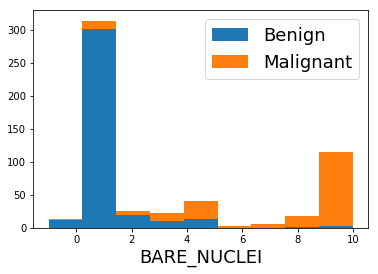

In [14]:
fig, ax1 = plt.subplots()

ax1.hist([data_train.loc[data_train.CLASS==2,'BARE_NUCLEI'].values,
          data_train.loc[data_train.CLASS==4,'BARE_NUCLEI'].values],
         label=('Benign','Malignant'),
         bins=9,histtype='barstacked')
ax1.set_xlabel('BARE_NUCLEI',fontsize=18)
ax1.legend(fontsize=18)

plt.show()

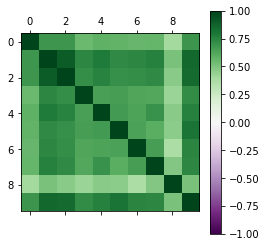

In [15]:
plt.matshow(data_train.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.colorbar()

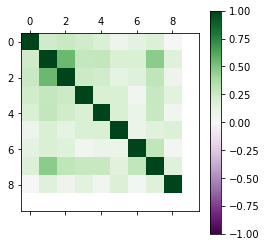

In [16]:
plt.matshow(data_train.loc[data_train.CLASS==2].corr(method='spearman'),
            vmax=1,vmin=-1,cmap='PRGn')
plt.colorbar()

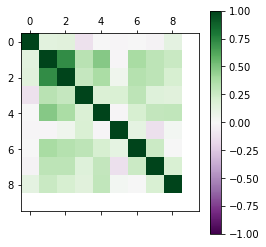

In [17]:
plt.matshow(data_train.loc[data_train.CLASS==4].corr(method='spearman'),
            vmax=1,vmin=-1,cmap='PRGn')
plt.colorbar()

In [18]:
print(data_train.columns[1])

UNIFORMITY_SIZE


The variable 'UNIFORMITY_SIZE' is correlated to other features pretty strongly within two classes, so I will exclude this feature. I will then use a linear SVC to model the data.

In [19]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

z_train = data_train.values[:,[0,2,3,4,5,6,7,8]]
z_test = (data_train.values[:,9] == 4)


clf = svm.SVC(kernel='linear', C=1,class_weight = 'balanced')
scores = cross_val_score(clf, z_train, z_test, cv=5)
scores

array([ 0.94642857,  0.97321429,  0.97321429,  0.98198198,  0.97297297])

Confusion matrix, without normalization
[[88  1]
 [ 1 50]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.02  0.98]]


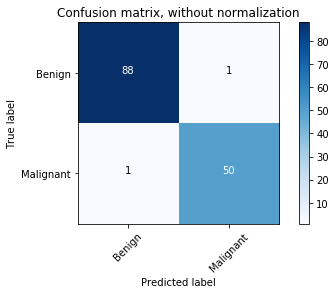

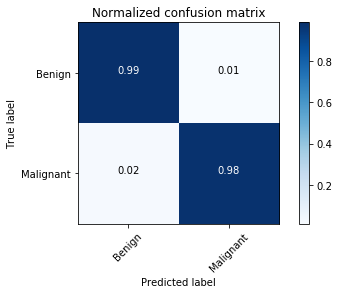

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(z_train, z_test, 
                                                    random_state=95,
                                                    test_size=0.25)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=.1,class_weight = 'balanced')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

class_names = ('Benign','Malignant')


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

This model appears to be performing pretty well right out of the box, though we are mis-classifying 2% of malignant tumors as benign, which could be concerning. I did a manual grid search across the regularization parameter C but saw no improvement. For C below 0.01 I saw precision drop a lot. I interpret this as the regularization term dominating the objective function in the optimization. 

Based on this I choose C = 0.1 and train on the full train dataset and test the hold-out set.

Confusion matrix, without normalization
[[93  4]
 [ 1 42]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


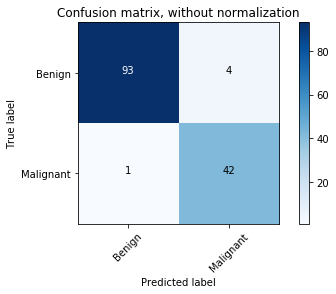

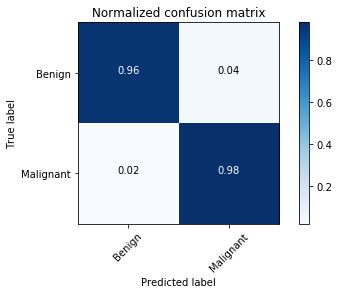

In [21]:
x_holdout = data_test.values[:,[0,2,3,4,5,6,7,8]]
y_holdout = (data_test.values[:,[9]] == 4)

y_pred = classifier.fit(z_train, z_test).predict(x_holdout)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_holdout, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Conclusion

It appears the classifier is performing pretty well on the holdout set, as with the cross-validation data. This is a pretty strong prediction but some improvements could be made by exploring other models such as Random Forest or transforming the parameters.